In [ ]:
# References
# https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

In [1]:
%matplotlib ipympl

import gym
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [89]:
env_name = "CartPole-v1"
episode_length = 500

## Define Agent

Naive agent that only acts based on pole angle

In [64]:
class Agent():
    def __init__(self, env):
        self.action_size = env.action_space.n
        
    def get_action(self, state):
        pole_angle, pole_angular_velocity = state[2:4]
        return 0 if pole_angle < 0 else 1

In [87]:
# V4
class Agent():
    def __init__(self, env):
        self.action_size = env.action_space.n
        
    def get_action(self, state):
        pole_angle, pole_angular_velocity = state[2:4]
        if (abs(pole_angle) < 0.02):
            action  = 0 if pole_angular_velocity < 0 else 1
        else:
            action  = 0 if pole_angle < 0 else 1
        return action

PID Controller

In [84]:
# V5 PID
class Agent():
    def __init__(self, env):
        self.action_size = env.action_space.n
        self.angle_integral = 0
        
    def get_action(self, state):
        pole_angle, pole_angular_velocity = state[2:4]
        self.angle_integral += pole_angle
        p = 0.7
        d = 0.2
        i = 0.1
        composite = p*pole_angle + d*pole_angular_velocity + i*self.angle_integral
        action = 0 if composite < 0 else 1
        return action

## Live plot

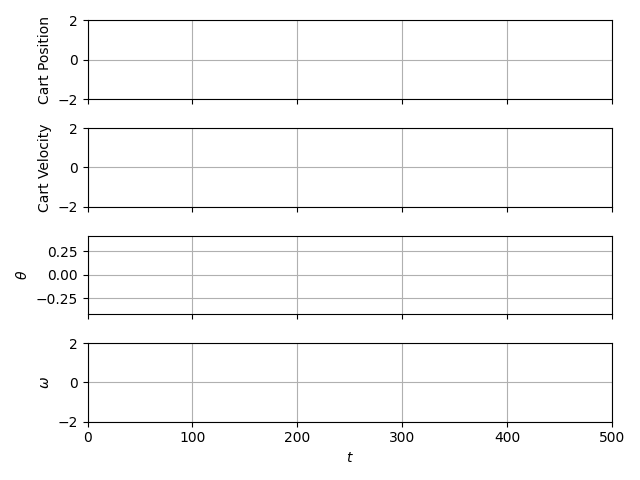

In [90]:

fig, axes = plt.subplots(4,1)
lines = []

# Set common settings
for i, ax in enumerate(axes):
    ax.grid()
    ax.set_xlim(0,episode_length)
    lines.append(ax.plot([], []))
    if i != len(axes)-1:
        ax.get_xaxis().set_ticklabels([])

axes[0].set_ylabel('Cart Position')
axes[0].set_ylim(-2, 2)
axes[1].set_ylabel('Cart Velocity')
axes[1].set_ylim(-2, 2)
axes[2].set_ylabel(r'$\theta$')
axes[2].set_ylim(-0.418, 0.418)
axes[3].set_ylabel(r'$\omega$')
axes[3].set_ylim(-2, 2)

ax.set_xlabel(r'$t$')

fig.tight_layout()

observations = []
frames = []

def plot_state(observation, frame_no):
    observations.append(observation)
    frames.append(frame_no)
    
    obs_transpose = np.array(observations).T
    
    for i in range (len(obs_transpose)):
        lines[i][0].set_data(frames, obs_transpose[i])

    fig.canvas.draw()


## Run environment

In [91]:
env = gym.make(env_name)
agent = Agent(env)
results = list()
final_positions = list()

for i_episode in range(3):
    observations.clear()
    frames.clear()
    observation = env.reset()
    for t in range(episode_length):
        env.render()
        plot_state(observation, t)
        action = agent.get_action(observation)

        observation, reward, done, info = env.step(action)
        #time.sleep(2)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            results.append(t+1)
            final_positions.append(observation[0])
            break
    
            
print(f"Final Results:{results}")
print(f"Final Positions:{final_positions}")
env.close()

plt.close()

Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Final Results:[500, 500, 500]
Final Positions:[-0.21842115, -0.13465548, 0.5528143]


: 

In [62]:
plt.close('all')